## Nearest Neighbor No Revisits - Hyperbolic

In [1]:
import pandas as pd 
import numpy as np
import time 
import datetime
import os

allscores = []

##loops over possible maps
for i in range(1,21):#21
    #now = datetime.datetime.today().strftime('%m-%d-%y_%H-%M-%S-%f')
    
    #Load map data
    df1 = pd.read_excel('/Users/adolf/Documents/NRT-Hyperbolic_Search/Node_Location_Data/'+str(i)+'.xlsx')
    df2 = pd.read_excel('/Users/adolf/Documents/NRT-Hyperbolic_Search/Node_Distances_Data/'+str(i)+'.xlsx')
    
    
    #Get starting fuel for map, turn dataframes into arrays
    df1 = df1.values
    df2 = df2.values
    #print('iterator i', i)
    
    ##looping over every node starting point
    for j in range(0,50):#50
        now = datetime.datetime.today().strftime('%m-%d-%y_%H-%M-%S-%f')
        #Values to collect
        energyhist = []
        nx = []
        ny = []
        node = []
        scorehist = []
        #check list
        distancehist = []
        #print('iterator j', j)
        energy = (np.sum(df2)/(50**2-50))*50/5
        ##looping over possible number of unique nodes to visit
        for k in range(len(df1)):
            #print('iterator k', k)
            if energy > 0:
                ##search without revisits trying each node as the starting point
                #makes starting node based on current possible node list
                if len(node) < 1:
                    node_index = j
                    node.append(node_index)
                    scorehist.append(1)
                    nx.append(df1[node_index][0])
                    ny.append(df1[node_index][1])
                    energyhist.append(energy)
                ##uses node_index to identify current node and create a list of possible connections to other nodes (distances) 
                a = df2[node_index][:]
                a = a.tolist()
                ##closest distance is defined by searching list a for non zero min
                closest_distance = min(x for x in a if x != 0.0)
                ##Checks if closest_distance value is not coming from a previously visited node
                if a.index(closest_distance) in node:
                    #print('redundant node found')
                    while a.index(closest_distance) in node:
                        a[a.index(closest_distance)] = 0.0
                        closest_distance = min(x for x in a if x != 0.0)
                        if closest_distance in distancehist:
                            #print('CHECK 2')
                            a[a.index(closest_distance)] = 0.0
                            closest_distance = min(x for x in a if x != 0.0)
                    
                    node_index = a.index(closest_distance)
                    distancehist.append(closest_distance)
                    node.append(node_index)
                    energy = energy - closest_distance
                    energyhist.append(energy)
                    nx.append(df1[node_index][0])
                    ny.append(df1[node_index][1])
                    scorehist.append(len(node))
                    
                else:
                    node_index = a.index(closest_distance)
                    distancehist.append(closest_distance)
                    node.append(node_index)
                    energy = energy - closest_distance
                    energyhist.append(energy)
                    nx.append(df1[node_index][0])
                    ny.append(df1[node_index][1])
                    scorehist.append(len(node))
                  
                if len(node) != len(set(node)):
                    print('Map',i,'Starting Node',j,'OOF!')
                #print(energy)
                #print('-----------------------')
                if energy < 0:
                    score = len(node) - 1 ##participants have been allowed to reach for the last node with whatever fuel amount left, for comparison with optimal algorithms we subtract 1
                    allscores.append(score)
                    #wrap up data into csv and save it in relevant directory
                    #hog = np.transpose([energyhist,nx,ny,node,scorehist])
                    
                    #hogdata = pd.DataFrame(data=hog,columns=['Energy','X','Y','Node','Score'])
                    
                    #hogdata.to_csv('/Users/adolf/Documents/NRT-Hyperbolic_Search/shw_data/hyperbolic/'+str(i)+'/hogdata'+'_'+now+'.csv', sep=',')
                    print(score)
                    
            
            

print(len(allscores))




29
29
28
29
27
27
28
30
28
27
30
30
29
31
32
27
31
29
28
27
31
27
29
32
28
28
27
27
32
28
30
28
31
28
31
29
31
30
28
27
27
31
31
27
27
29
27
31
30
30
29
29
29
30
29
28
29
28
29
28
28
28
30
29
29
29
28
30
28
29
29
29
28
29
30
29
30
28
28
29
28
28
29
29
29
28
30
29
29
31
29
28
28
29
29
28
31
30
28
30
26
27
27
26
31
27
27
30
26
27
25
26
29
28
28
26
28
26
25
27
29
27
27
29
30
28
31
29
29
25
28
25
25
26
27
27
26
27
26
25
27
25
29
26
29
27
25
26
28
29
31
31
25
31
24
29
31
30
31
30
31
31
28
30
30
29
31
29
24
28
31
30
31
28
30
28
30
30
29
31
31
30
30
30
32
29
31
28
30
31
32
30
25
30
29
31
24
30
31
29
29
28
28
28
27
28
27
27
28
26
28
27
27
28
28
28
28
28
26
26
27
28
27
28
27
28
28
27
28
28
27
28
28
27
27
27
28
28
26
28
28
27
26
26
27
27
27
27
28
27
30
29
29
29
30
29
30
29
29
29
29
30
30
29
29
30
29
29
30
29
31
29
29
29
30
31
30
30
29
29
30
30
29
29
29
30
28
29
29
29
28
29
30
29
29
29
29
30
30
30
28
27
29
28
28
28
29
28
28
29
28
28
28
28
28
28
28
28
28
29
28
28
27
28
27
28
28
28
27
28
28
29
26
2

In [2]:
allscores = np.asarray(allscores)
allscores = np.reshape(allscores,(20,50))
allscores.shape
print(allscores)
maxscores = np.amax(allscores, axis=1)
maxindex = np.argmax(allscores, axis=1)

maxindeces = []
for i in range(len(allscores)):
    maxindeces.append(np.argwhere(allscores[i] == np.amax(allscores[i])))


print(maxscores)
print(maxindex)
maxindeces
#maxscores.mean()

[[29 29 28 29 27 27 28 30 28 27 30 30 29 31 32 27 31 29 28 27 31 27 29 32
  28 28 27 27 32 28 30 28 31 28 31 29 31 30 28 27 27 31 31 27 27 29 27 31
  30 30]
 [29 29 29 30 29 28 29 28 29 28 28 28 30 29 29 29 28 30 28 29 29 29 28 29
  30 29 30 28 28 29 28 28 29 29 29 28 30 29 29 31 29 28 28 29 29 28 31 30
  28 30]
 [26 27 27 26 31 27 27 30 26 27 25 26 29 28 28 26 28 26 25 27 29 27 27 29
  30 28 31 29 29 25 28 25 25 26 27 27 26 27 26 25 27 25 29 26 29 27 25 26
  28 29]
 [31 31 25 31 24 29 31 30 31 30 31 31 28 30 30 29 31 29 24 28 31 30 31 28
  30 28 30 30 29 31 31 30 30 30 32 29 31 28 30 31 32 30 25 30 29 31 24 30
  31 29]
 [29 28 28 28 27 28 27 27 28 26 28 27 27 28 28 28 28 28 26 26 27 28 27 28
  27 28 28 27 28 28 27 28 28 27 27 27 28 28 26 28 28 27 26 26 27 27 27 27
  28 27]
 [30 29 29 29 30 29 30 29 29 29 29 30 30 29 29 30 29 29 30 29 31 29 29 29
  30 31 30 30 29 29 30 30 29 29 29 30 28 29 29 29 28 29 30 29 29 29 29 30
  30 30]
 [28 27 29 28 28 28 29 28 28 29 28 28 28 28 28 28 28 28 28

[array([[14],
        [23],
        [28]], dtype=int32), array([[39],
        [46]], dtype=int32), array([[ 4],
        [26]], dtype=int32), array([[34],
        [40]], dtype=int32), array([[0]], dtype=int32), array([[20],
        [25]], dtype=int32), array([[48]], dtype=int32), array([[ 5],
        [30],
        [37]], dtype=int32), array([[15],
        [40],
        [48]], dtype=int32), array([[ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [11],
        [14],
        [17],
        [18],
        [20],
        [21],
        [23],
        [24],
        [25],
        [27],
        [28],
        [31],
        [33],
        [35],
        [37],
        [38],
        [39],
        [40],
        [41],
        [45],
        [47],
        [48]], dtype=int32), array([[ 0],
        [ 1],
        [ 3],
        [ 7],
        [10],
        [12],
        [16],
        [17],
        [18],
        [22],
        [32],
        [39],
        [44]], dtype=int32), array(

In [3]:
l1 = [14,23,28]
l2 = [39,46]
l3 = [4,26]
l4 = [34,40]
l5 = [0]
l6 = [20,25]
l7 = [48]
l8 = [5,30,37]
l9 = [15,40,48]
l10 = [2,3,4,5,6,7,11,14,17,18,20,21,23,24,25,27,28,31,33,35,37,38,39,40,41,45,47,48]
l11 = [0,1,3,7,10,12,16,17,18,22,32,39,44]
l12 = [1,4,11,12,17,21,24,31,37,44,48,49]
l13 = [1,5,9,15,22,26,27,32,36,41,48]
l14 = [7,12,15,37]
l15 = [10,15]
l16 = [4,6,7,11,13,15,22,25,26,28,32,35,39]
l17 = [6]
l18 = [5,11,20,25,49]
l19 = [14,15,19,22,24,27,30,36,45,48]
l20 = [21,28,29,30,42]

dict1 = {'1':l1,'2':l2,'3':l3,'4':l4,'5':l5,'6':l6,'7':l7,'8':l8,'9':l9,'10':l10,'11':l11,'12':l12,'13':l13,'14':l14,'15':l15,'16':l16,'17':l17,'18':l18,'19':l19,'20':l20}
dict1

{'1': [14, 23, 28],
 '2': [39, 46],
 '3': [4, 26],
 '4': [34, 40],
 '5': [0],
 '6': [20, 25],
 '7': [48],
 '8': [5, 30, 37],
 '9': [15, 40, 48],
 '10': [2,
  3,
  4,
  5,
  6,
  7,
  11,
  14,
  17,
  18,
  20,
  21,
  23,
  24,
  25,
  27,
  28,
  31,
  33,
  35,
  37,
  38,
  39,
  40,
  41,
  45,
  47,
  48],
 '11': [0, 1, 3, 7, 10, 12, 16, 17, 18, 22, 32, 39, 44],
 '12': [1, 4, 11, 12, 17, 21, 24, 31, 37, 44, 48, 49],
 '13': [1, 5, 9, 15, 22, 26, 27, 32, 36, 41, 48],
 '14': [7, 12, 15, 37],
 '15': [10, 15],
 '16': [4, 6, 7, 11, 13, 15, 22, 25, 26, 28, 32, 35, 39],
 '17': [6],
 '18': [5, 11, 20, 25, 49],
 '19': [14, 15, 19, 22, 24, 27, 30, 36, 45, 48],
 '20': [21, 28, 29, 30, 42]}

In [24]:
import random

newhindexlist = []

for key, item in dict1.items():
    newhindexlist.append(random.choice(dict1[key]))
newhindexlist

[28, 46, 26, 34, 0, 25, 48, 30, 40, 28, 7, 1, 32, 37, 15, 15, 6, 49, 15, 21]

## Nearest Neighbor No Revisits - Euclidean

In [13]:

allescores = []

##loops over possible maps
for i in range(1,21):#21
    #now = datetime.datetime.today().strftime('%m-%d-%y_%H-%M-%S-%f')
    
    #Load map data
    df1 = pd.read_excel('/Users/adolf/Documents/NRT-Hyperbolic_Search/Eucl_Node_Location_Data/'+str(i)+'.xlsx')
    df2 = pd.read_excel('/Users/adolf/Documents/NRT-Hyperbolic_Search/Eucl_Node_Distances_Data/'+str(i)+'.xlsx')
    
    
    #Get starting fuel for map, turn dataframes into arrays
    df1 = df1.values
    df2 = df2.values
    #print('iterator i', i)
    
    ##looping over every node starting point
    for j in range(0,50):
        now = datetime.datetime.today().strftime('%m-%d-%y_%H-%M-%S-%f')
        #Values to collect
        energyhist = []
        nx = []
        ny = []
        node = []
        scorehist = []
        #check list
        distancehist = []
        #print('iterator j', j)
        energy = (np.sum(df2)/(50**2-50))*50/10
        ##looping over possible number of unique nodes to visit
        for k in range(len(df1)):
            #print('iterator k', k)
            if energy > 0:
                ##search without revisits trying each node as the starting point
                #makes starting node based on current possible node list
                if len(node) < 1:
                    node_index = j
                    node.append(node_index)
                    scorehist.append(1)
                    nx.append(df1[node_index][0])
                    ny.append(df1[node_index][1])
                    energyhist.append(energy)
                ##uses node_index to identify current node and create a list of possible connections to other nodes (distances) 
                a = df2[node_index][:]
                a = a.tolist()
                ##closest distance is defined by searching list a for non zero min
                closest_distance = min(x for x in a if x != 0.0)
                ##Checks if closest_distance value is not coming from a previously visited node
                if a.index(closest_distance) in node:
                    #print('redundant node found')
                    while a.index(closest_distance) in node:
                        a[a.index(closest_distance)] = 0.0
                        closest_distance = min(x for x in a if x != 0.0)
                        if closest_distance in distancehist:
                            #print('CHECK 2')
                            a[a.index(closest_distance)] = 0.0
                            closest_distance = min(x for x in a if x != 0.0)
                    
                    node_index = a.index(closest_distance)
                    distancehist.append(closest_distance)
                    node.append(node_index)
                    energy = energy - closest_distance
                    energyhist.append(energy)
                    nx.append(df1[node_index][0])
                    ny.append(df1[node_index][1])
                    scorehist.append(len(node))
                    
                else:
                    node_index = a.index(closest_distance)
                    distancehist.append(closest_distance)
                    node.append(node_index)
                    energy = energy - closest_distance
                    energyhist.append(energy)
                    nx.append(df1[node_index][0])
                    ny.append(df1[node_index][1])
                    scorehist.append(len(node))
                  
                if len(node) != len(set(node)):
                    print('Map',i,'Starting Node',j,'OOF!')
                #print(energy)
                #print('-----------------------')
                if energy < 0:
                    score = len(node) - 1 ##participants have been allowed to reach for the last node with whatever fuel amount left, for comparison with optimal algorithms we subtract 1
                    #wrap up data into csv and save it in relevant directory
                    #eog = np.transpose([energyhist,nx,ny,node,scorehist])
                    allescores.append(score)
                    #eogdata = pd.DataFrame(data=eog,columns=['Energy','X','Y','Node','Score'])
                    
                    #eogdata.to_csv('/Users/adolf/Documents/NRT-Hyperbolic_Search/shw_data/euclidean/'+str(i)+'/eogdata'+'_'+now+'.csv', sep=',')
                    print(score)
                    

23
23
25
20
24
23
22
24
24
25
24
24
23
23
24
19
25
25
23
26
23
23
24
22
24
25
23
24
23
25
23
20
23
24
26
23
24
24
24
20
25
20
22
22
24
23
23
22
20
20
21
22
24
24
23
22
23
22
22
23
22
20
19
23
22
22
21
25
22
24
21
23
24
22
21
23
24
20
23
24
22
22
24
23
21
22
21
22
22
23
20
20
22
22
22
21
22
20
21
23
20
20
23
20
22
23
19
23
20
23
19
21
20
19
20
21
23
23
24
20
21
24
21
23
22
19
20
23
22
19
21
23
23
23
24
23
23
23
20
20
21
23
23
20
23
19
23
23
21
20
23
26
24
22
25
24
26
23
23
23
22
26
25
22
24
26
23
24
25
23
26
22
22
24
26
24
27
27
23
25
27
23
26
25
23
23
27
26
24
23
25
23
25
26
26
24
26
24
24
23
25
26
25
24
23
23
25
23
22
23
24
23
25
24
23
25
25
23
24
24
25
24
24
24
24
26
24
25
23
26
24
26
24
23
26
23
25
24
24
21
25
24
23
22
25
23
25
24
23
24
21
23
21
21
23
24
23
23
21
21
24
23
21
23
22
23
23
21
22
21
20
24
22
21
24
23
21
21
24
23
21
22
24
24
21
24
24
22
25
22
23
23
23
24
23
23
21
21
23
21
23
21
19
21
21
23
23
22
24
22
22
23
22
23
21
23
23
24
24
24
20
24
23
25
24
21
21
24
24
23
22
22
23
2

In [14]:
allescores = np.asarray(allescores)
allescores = np.reshape(allescores,(20,50))
allescores.shape

maxescores = np.amax(allescores, axis=1)
maxescores
maxindex = np.argmax(allescores, axis=1)

emaxindeces = []
for i in range(len(allescores)):
    emaxindeces.append(np.argwhere(allescores[i] == np.amax(allescores[i])))

emaxindeces
##if new path has same reward as old path but lower cost (total amount of fuel used) keep the new path

[array([[19],
        [34]], dtype=int32), array([[17]], dtype=int32), array([[18],
        [21],
        [34]], dtype=int32), array([[26],
        [27],
        [30],
        [36]], dtype=int32), array([[ 1],
        [25],
        [29],
        [31],
        [34]], dtype=int32), array([[38]], dtype=int32), array([[23]], dtype=int32), array([[ 6],
        [28]], dtype=int32), array([[ 3],
        [ 6],
        [30],
        [43]], dtype=int32), array([[14],
        [46]], dtype=int32), array([[14],
        [38]], dtype=int32), array([[4],
        [7]], dtype=int32), array([[23]], dtype=int32), array([[13],
        [15],
        [23]], dtype=int32), array([[17]], dtype=int32), array([[ 0],
        [20],
        [42]], dtype=int32), array([[ 5],
        [ 6],
        [ 8],
        [10],
        [20],
        [21],
        [49]], dtype=int32), array([[44]], dtype=int32), array([[16],
        [24],
        [38]], dtype=int32), array([[ 3],
        [ 5],
        [ 6],
        [ 9],
        

In [15]:
j1 = [19,34]
j2 = [17]
j3 = [18,21,34]
j4 = [26,27,30,36]
j5 = [1,25,29,31,34]
j6 = [38]
j7 = [23]
j8 = [6,28]
j9 = [3,6,30,43]
j10 = [14,46]
j11 = [14,38]
j12 = [4,7]
j13 = [23]
j14 = [13,15,23]
j15 = [17]
j16 = [0,20,42]
j17 = [5,6,8,10,20,21,49]
j18 = [44]
j19 = [16,24,38]
j20 = [3,5,6,9,30]

dict2 = {'1':j1,'2':j2,'3':j3,'4':j4,'5':j5,'6':j6,'7':j7,'8':j8,'9':j9,'10':j10,'11':j11,'12':j12,'13':j13,'14':j14,'15':j15,'16':j16,'17':j17,'18':j18,'19':j19,'20':j20}
dict2

{'1': [19, 34],
 '2': [17],
 '3': [18, 21, 34],
 '4': [26, 27, 30, 36],
 '5': [1, 25, 29, 31, 34],
 '6': [38],
 '7': [23],
 '8': [6, 28],
 '9': [3, 6, 30, 43],
 '10': [14, 46],
 '11': [14, 38],
 '12': [4, 7],
 '13': [23],
 '14': [13, 15, 23],
 '15': [17],
 '16': [0, 20, 42],
 '17': [5, 6, 8, 10, 20, 21, 49],
 '18': [44],
 '19': [16, 24, 38],
 '20': [3, 5, 6, 9, 30]}

In [25]:
neweindexlist = []

for key, item in dict2.items():
    neweindexlist.append(random.choice(dict2[key]))
neweindexlist

[34, 17, 34, 30, 1, 38, 23, 6, 3, 14, 14, 4, 23, 15, 17, 0, 5, 44, 24, 3]

## Load and Plot Data

In [1]:
import pandas as pd 
import numpy as np
import time 
import datetime
import os

frames1 = []
frames2 = []

for x in range(1,21):
	os.chdir('/Users/adolf/Documents/NRT-Hyperbolic_Search/shw_data/hyperbolic/'+str(x)+'')
	for filename in os.listdir(os.getcwd()):
		if filename.endswith(".csv"):
			#csvfiles.append(str(filename))
			frames1.append(pd.read_csv(filename))
hyperbolic = pd.concat(frames1)

In [2]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
for i in range(0,len(frames1),20):
    newplot = frames1[i]
    plt.figure()
    plt.plot(newplot.values[:,1],newplot.values[:,2],'--b',linewidth=3)
    plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [3]:
for x in range(1,21):
	os.chdir('/Users/adolf/Documents/NRT-Hyperbolic_Search/shw_data/euclidean/'+str(x)+'')
	for filename in os.listdir(os.getcwd()):
		if filename.endswith(".csv"):
			#csvfiles.append(str(filename))
			frames2.append(pd.read_csv(filename))
euclidean = pd.concat(frames2)

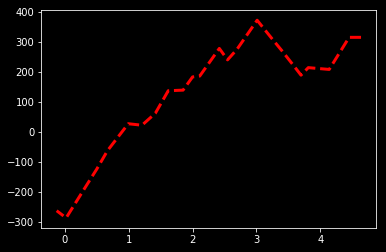

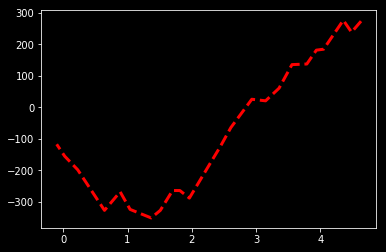

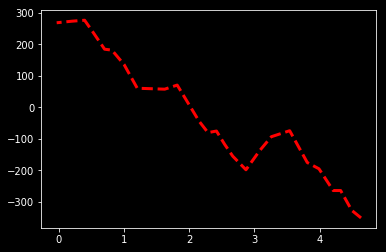

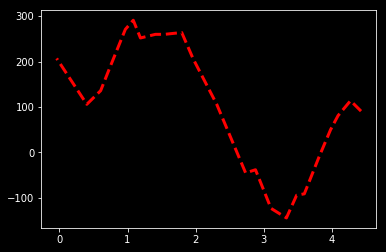

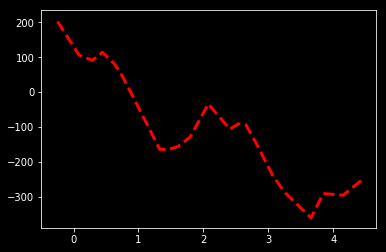

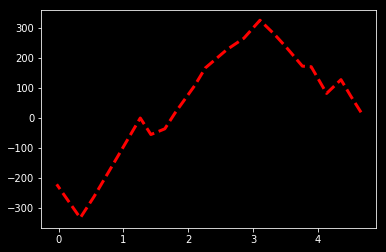

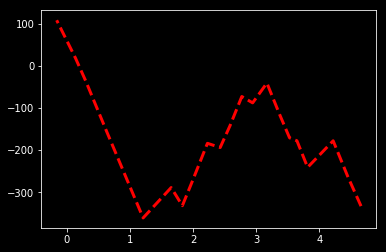

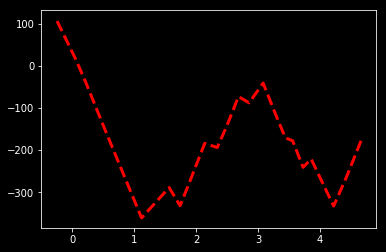

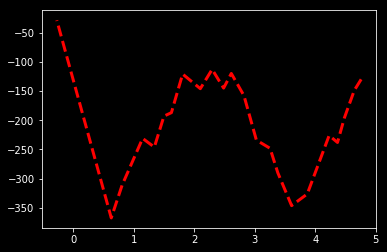

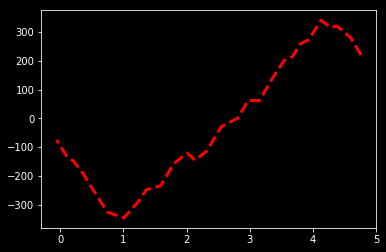

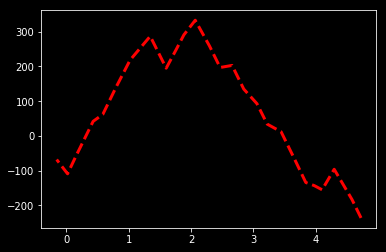

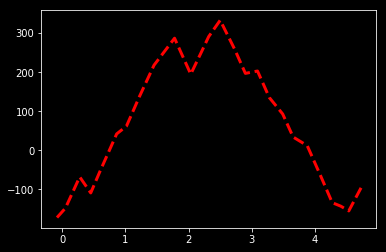

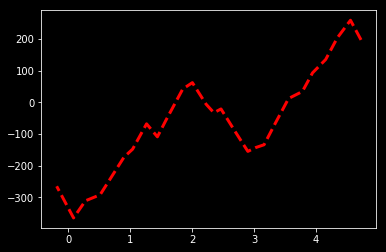

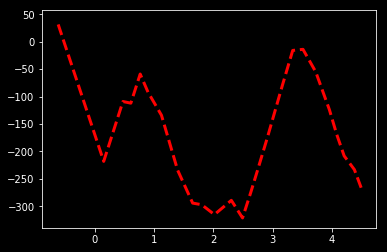

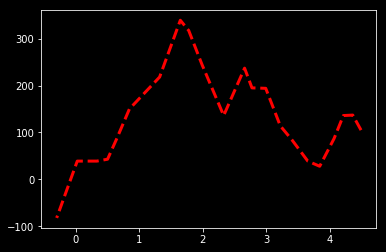

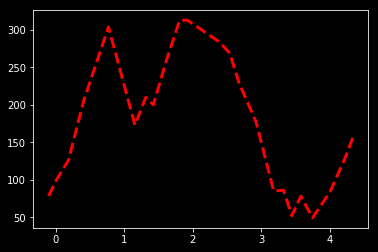

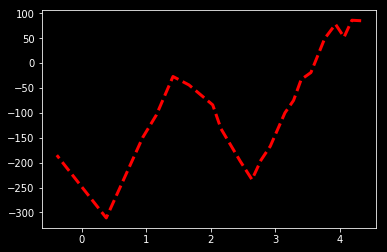

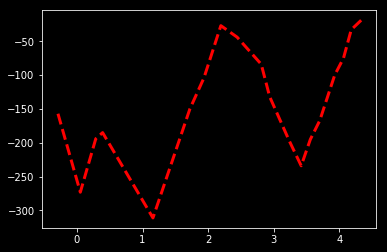

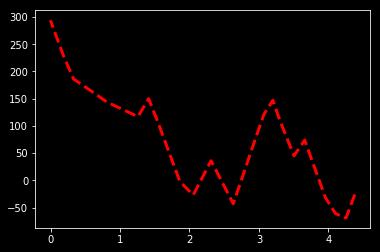

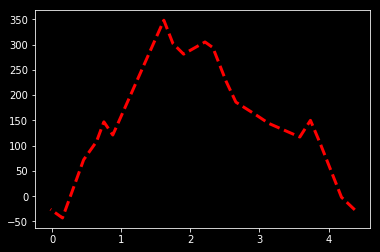

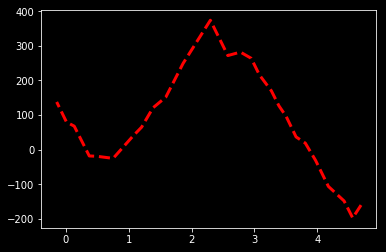

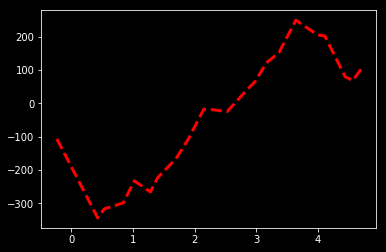

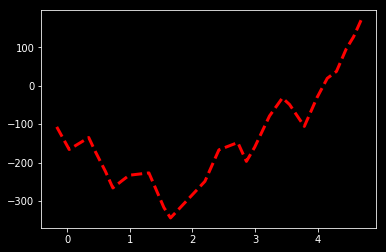

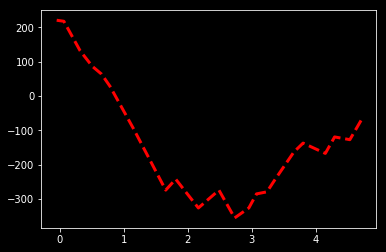

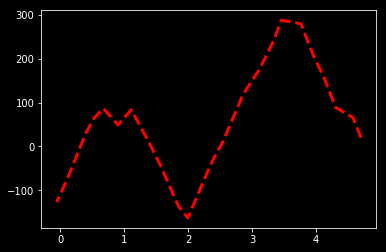

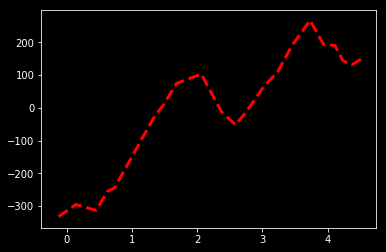

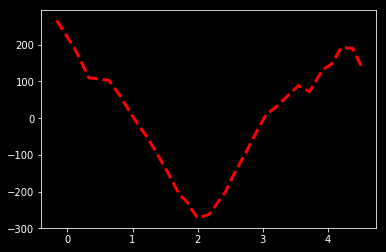

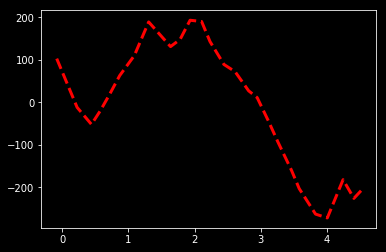

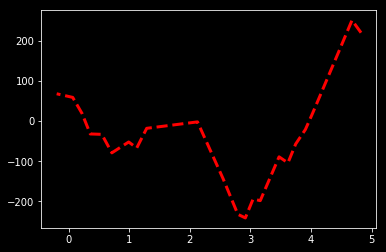

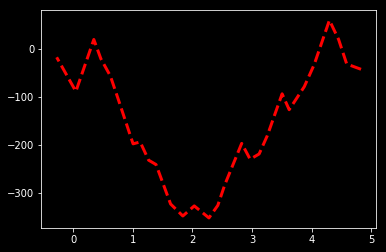

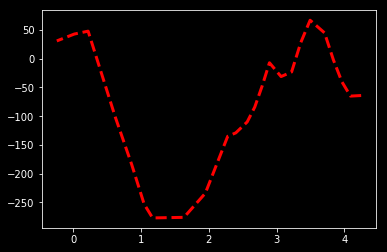

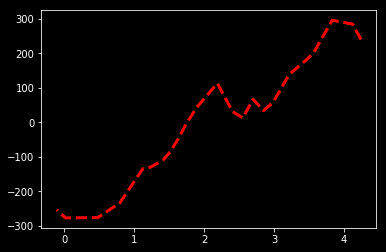

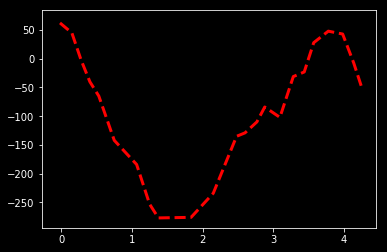

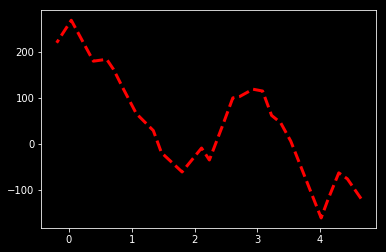

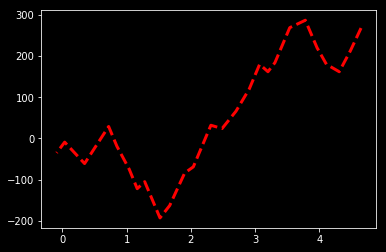

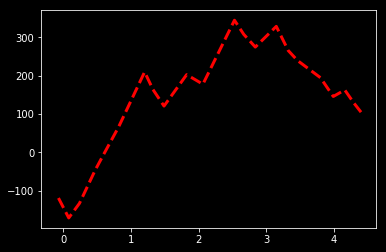

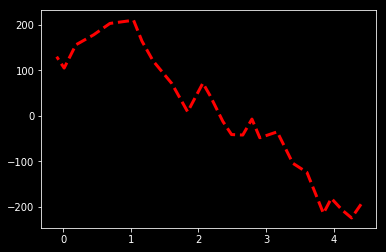

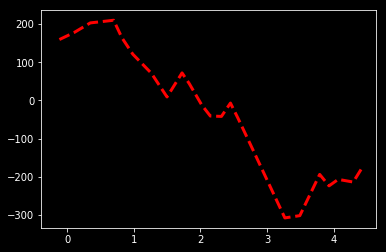

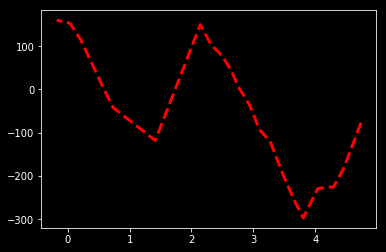

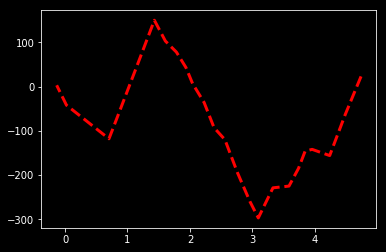

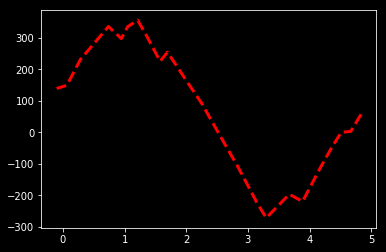

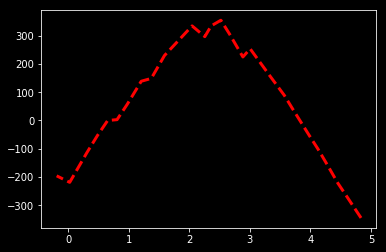

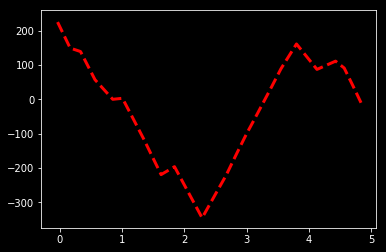

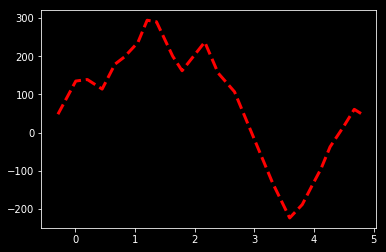

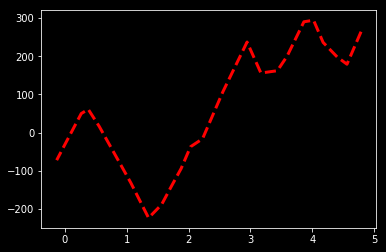

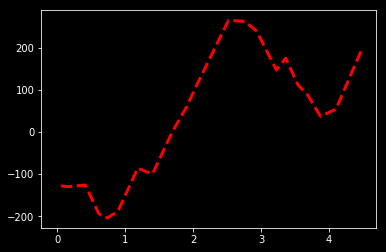

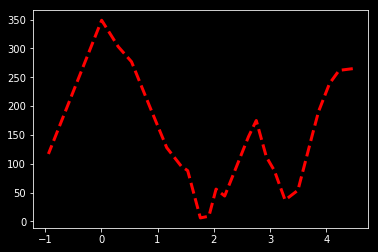

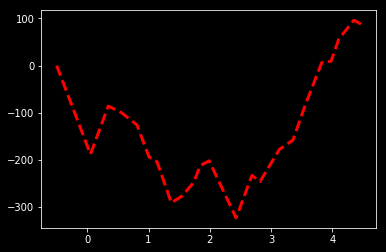

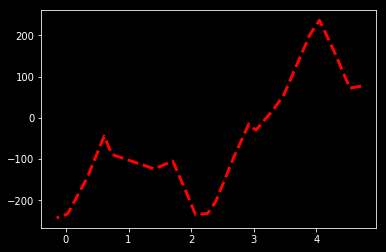

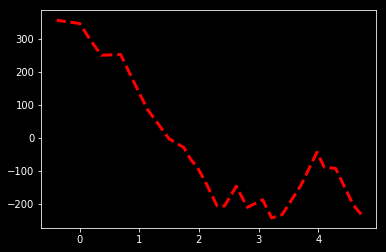

In [4]:
plt.style.use('dark_background')
for i in range(0,len(frames2),20):
    newplot = frames2[i]
    plt.figure()
    plt.plot(newplot.values[:,1],newplot.values[:,2],'--r',linewidth=3)
    plt.show()

In [5]:
scores = []

for i in range(len(frames1)):
    parse = frames1[i]
    scores.append(parse.values[-1,5])

def to_matrix(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]  

map_scores = to_matrix(scores, 50)
map_scores = pd.DataFrame(map_scores)

average_scores = pd.DataFrame({"Scores":map_scores.mean(axis=1)})
average_scores

#average_scores.to_csv('/Users/adolf/Documents/NRT-Hyperbolic_Search/shw_data/nn_mean_scores.csv')

,Scores
0,29.96
1,29.90
2,28.18
3,30.50
4,28.40
5,30.38
6,28.90
7,28.72
8,28.30
9,26.44


In [6]:
escores = []

for i in range(len(frames2)):
    parse = frames2[i]
    escores.append(parse.values[-1,5])  

map_escores = to_matrix(escores, 50)
map_escores = pd.DataFrame(map_escores)

average_escores = pd.DataFrame({"Scores":map_escores.mean(axis=1)})
average_escores

#average_escores.to_csv('/Users/adolf/Documents/NRT-Hyperbolic_Search/shw_data/nn_mean_escores.csv')

,Scores
0,24.14
1,23.12
2,22.52
3,25.36
4,25.04
5,23.42
6,23.46
7,23.90
8,24.80
9,24.14


In [7]:
#look at how many are reaching max per map

In [8]:
hyperbolic_NN = pd.concat(frames1)
euclidean_NN = pd.concat(frames2)

hyperbolic_NN.to_csv('/Users/adolf/Documents/NRT-Hyperbolic_Search/shw_data/hyperbolic_NN.csv')
euclidean_NN.to_csv('/Users/adolf/Documents/NRT-Hyperbolic_Search/shw_data/euclidean_NN.csv')
